# Chicago Crime Data Analysis 
####  Part 2

*Christina Brockway*y

use a prepared zip file with the Chicago Crime Data:
https://drive.google.com/file/d/1avxUlCAros-R9GF6SKXqM_GopzO7VwA5/view?usp=drive_link

**Original Source is the Chicago Data Portal: Crimes 2001 to Present**

**Data Description**
https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2/data

-  includes type of crime, exact data/time, lat/long, District/ward, was there an arrest,....

### Data Dictionary

Taken from: data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0pky"><span style="font-weight:bold">**Name**</span></th>
    <th class="tg-0pky"><span style="font-weight:bold">**dtype**</span></th>
    <th class="tg-0pky"><span style="font-weight:bold">**Description**</span></th>
    <th class="tg-0pky"></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">ID</td>
    <td class="tg-0pky">int64</td>
    <td class="tg-0pky">Unique identifier for the record</td>
    <td class="tg-0pky">numeric</td>
  </tr>
  <tr>
    <td class="tg-0pky">Date</td>
    <td class="tg-0pky">object</td>
    <td class="tg-0pky">Date incident occured</td>
    <td class="tg-0pky">date/time</td>
  </tr>
  <tr>
    <td class="tg-0pky">Primary Type</td>
    <td class="tg-0pky">object</td>
    <td class="tg-0pky">Primary description of the IL Uniform Crime Reporting code</td>
    <td class="tg-0pky">categorical</td>
  </tr>
  <tr>
    <td class="tg-0pky">Description</td>
    <td class="tg-0pky">object </td>
    <td class="tg-0pky">Secondary description of IUCR code</td>
    <td class="tg-0pky">categorical</td>
  </tr>
  <tr>
    <td class="tg-0pky">Location Description</td>
    <td class="tg-0pky">object </td>
    <td class="tg-0pky">Location where incident occurred</td>
    <td class="tg-0pky">categorical</td>
  </tr>
  <tr>
    <td class="tg-0pky">Arrest</td>
    <td class="tg-0pky">bool</td>
    <td class="tg-0pky">was an arrest made? </td>
    <td class="tg-0pky">true/false</td>
  </tr>
  <tr>
    <td class="tg-0pky">Domestic</td>
    <td class="tg-0pky">bool</td>
    <td class="tg-0pky">was the incident domestic related? </td>
    <td class="tg-0pky">true/false</td>
  </tr>
  <tr>
    <td class="tg-0pky">Beat</td>
    <td class="tg-0pky">int64</td>
    <td class="tg-0pky">beat where occured, Beat: smallest geo area deidcate police beat car</td>
    <td class="tg-0pky">numeric</td>
  </tr>
  <tr>
    <td class="tg-0pky">District</td>
    <td class="tg-0pky">float64</td>
    <td class="tg-0pky">indicates district where occured</td>
    <td class="tg-0pky">numeric</td>
  </tr>
  <tr>
    <td class="tg-0pky">Ward</td>
    <td class="tg-0pky">float64</td>
    <td class="tg-0pky">indicates city council district/ward where occured</td>
    <td class="tg-0pky">numeric</td>
  </tr>
  <tr>
    <td class="tg-0pky">Latitude</td>
    <td class="tg-0pky">float64 </td>
    <td class="tg-0pky">latitude where occured</td>
    <td class="tg-0pky">numeric</td>
  </tr>
  <tr>
    <td class="tg-0pky">Longitude</td>
    <td class="tg-0pky">float64</td>
    <td class="tg-0pky">longitude where occured</td>
    <td class="tg-0pky">numeric</td>
  </tr>
</tbody>
</table>

# Task

For this phase of the project:
*  Help Chicago law enforcement allocate reqources for the next 6 months
*  Compare the crime count forecast for the following:
    * battery
    * narcotics
*  For each crime selected:
    - transform data to time series of the crime count per month 
    - split the data and fit to model
        - make and plot forecasts
        - obtain metrics
    - tune model with pmdarima's auto_arima
        - make and plot forecasts
        - obtain metrics
    - Select final model and justify choice
    - Make future forecasts
    *  Answer the following:
        - Calculate the predicted net change in the number (raw counts) of this type of crime from the beginning of the forecast to the end.
        - Convert the raw delta into a percent change.

*  Prepare a final evaluation:
        - Of the two crimes, which is forecasted to have the highest monthly count of crimes at the end of the forecast?
        - Of the two crimes, which is forecasted to have the highest net change by the end of the forecast?
        - Of the two crimes, which is forecasted to have the highest percent change by the end of the forecast?
   
*  Make a final recommendation:
        - What recommendation would you make to the Chicago law enforcement?
        - Include reporting-quality visuals to support recommendation.

### Imports, Custom Functions, Load Data

In [1]:
#!pip install pmdarima

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
import os
import matplotlib as mpl

from pmdarima.arima.utils import ndiffs, nsdiffs
from pmdarima.model_selection import train_test_split
import pmdarima as pm
from scipy.signal import find_peaks
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
# Set paramters
plt.rcParams['figure.figsize']=(12,3)

In [3]:
# Custom function for Ad Fuller Test
def get_adfuller_results(ts, alpha=.05, label='adfuller', **kwargs): #kwargs for adfuller()
    # Saving each output
    (test_stat, pval, nlags, nobs, crit_vals_d,
    icbest ) = tsa.adfuller(ts, **kwargs)
    # Converting output to a dictionary with the interpretation of p
    adfuller_results = {'Test Statistic': test_stat,
                        "# of Lags Used":nlags,
                       '# of Observations':nobs,
                        'p-value': round(pval,6),
                        'alpha': alpha,
                       'sig/stationary?': pval < alpha}
    return pd.DataFrame(adfuller_results, index =[label])

In [4]:
def plot_acf_pacf(ts, nlags=40, figsize=(10, 5),
                  annotate_sig=False, alpha=.05,
                 acf_kws={}, pacf_kws={},
                  annotate_seas=False, m = None,
                 seas_color='black'):

    fig, axes = plt.subplots(nrows=2, figsize=figsize)


    # Sig lags line style
    sig_vline_kwargs = dict( ls=':', lw=1, zorder=0, color='red')

    # ACF
    tsa.graphics.plot_acf(ts, ax=axes[0], lags=nlags, **acf_kws)

    ## Annotating sig acf lags
    if annotate_sig == True:
        sig_acf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='ACF')
        for lag in sig_acf_lags:
            axes[0].axvline(lag,label='sig', **sig_vline_kwargs )

    # PACF
    tsa.graphics.plot_pacf(ts,ax=axes[1], lags=nlags, **pacf_kws)

    ## Annotating sig pacf lags
    if annotate_sig == True:
        ## ANNOTATING SIG LAGS
        sig_pacf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='PACF')
        for lag in sig_pacf_lags:
            axes[1].axvline(lag, label='sig', **sig_vline_kwargs)




    ### ANNOTATE SEASONS
    if annotate_seas == True:
        # Ensure m was defined
        if m is None:
            raise Exception("Must define value of m if annotate_seas=True.")

        ## Calculate number of complete seasons to annotate
        n_seasons = nlags//m

        # Seasonal Lines style
        seas_vline_kwargs = dict( ls='--',lw=1, alpha=.7, color=seas_color, zorder=-1)

        ## for each season, add a line
        for i in range(1, n_seasons+1):
            axes[0].axvline(m*i, **seas_vline_kwargs, label="season")
            axes[1].axvline(m*i, **seas_vline_kwargs, label="season")

    fig.tight_layout()

    return fig

In [5]:
def regression_metrics_ts(ts_true, ts_pred, label="", verbose=True, output_dict=False,):
    # Get metrics
    mae = mean_absolute_error(ts_true, ts_pred)
    mse = mean_squared_error(ts_true, ts_pred)
    rmse = mean_squared_error(ts_true, ts_pred, squared=False)
    r_squared = r2_score(ts_true, ts_pred)
    mae_perc = mean_absolute_percentage_error(ts_true, ts_pred) * 100

    if verbose == True:
        # Print Result with label
        header = "---" * 20
        print(header, f"Regression Metrics: {label}", header, sep="\n")
        print(f"- MAE = {mae:,.3f}")
        print(f"- MSE = {mse:,.3f}")
        print(f"- RMSE = {rmse:,.3f}")
        print(f"- R^2 = {r_squared:,.3f}")
        print(f"- MAPE = {mae_perc:,.2f}%")

    if output_dict == True:
        metrics = {
            "Label": label,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "R^2": r_squared,
            "MAPE(%)": mae_perc,
        }
        return metrics


In [6]:
def plot_forecast(ts_train, ts_test, forecast_df, n_train_lags=None,
                  figsize=(10,4), title='Comparing Forecast vs. True Data'):
    ### PLot training data, and forecast (with upper/,lower ci)
    fig, ax = plt.subplots(figsize=figsize)

    # setting the number of train lags to plot if not specified
    if n_train_lags==None:
        n_train_lags = len(ts_train)

    # Plotting Training  and test data
    ts_train.iloc[-n_train_lags:].plot(ax=ax, label="train")
    ts_test.plot(label="test", ax=ax)

    # Plot forecast
    forecast_df['mean'].plot(ax=ax, color='green', label="forecast")

    # Add the shaded confidence interval
    ax.fill_between(forecast_df.index,
                    forecast_df['mean_ci_lower'],
                   forecast_df['mean_ci_upper'],
                   color='green', alpha=0.3,  lw=2)

    # set the title and add legend
    ax.set_title(title)
    ax.legend();

    return fig, ax


In [7]:
import matplotlib.dates as mdates
def plot_seasonal(seasonal):
    minor_loc = mdates.MonthLocator()
    fig, ax = plt.subplots()
    ax.plot(seasonal, marker='o')
    ax.set(title='Seasonal Component for New York');
    ax.xaxis.set_minor_locator(minor_loc)
    ax.grid(which='major', axis='x',lw=1, color='k')
    ax.grid(which='minor',axis='x',lw=0.5)
    fig.autofmt_xdate(rotation=90, ha='center')

    return fig, ax

In [8]:
#Load data
df = pd.read_csv('data/Chicago-Crime-glob.csv')
df.head(2)

,Date,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,2001-01-01 01:00:00,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
1,2001-01-01 01:00:00,1317937,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,334,3.0,NaN,41.762514,-87.565877


In [9]:
#Drop all rows that are not needed
dff= df[['Primary Type', 'Date']]
dff

,Primary Type,Date
0,BATTERY,2001-01-01 01:00:00
1,BATTERY,2001-01-01 01:00:00
2,THEFT,2001-01-01 01:00:00
3,THEFT,2001-01-01 01:00:00
4,OTHER OFFENSE,2001-01-01 01:00:00
...,...,...
7713104,ASSAULT,2022-12-31 12:50:00
7713105,ASSAULT,2022-12-31 12:50:00
7713106,BATTERY,2022-12-31 12:52:00
7713107,ASSAULT,2022-12-31 12:52:00


In [10]:
# Change the Date column to datetime
dff['Date'] = pd.to_datetime(dff['Date'], format ="%Y-%m-%d %H:%M:%S")
# Set the Date column to the index
dff = dff.set_index('Date')
dff.head()

C:\Users\csbro\AppData\Local\Temp\ipykernel_2904\4029940768.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['Date'] = pd.to_datetime(dff['Date'], format ="%Y-%m-%d %H:%M:%S")


,Primary Type
Date,
2001-01-01 01:00:00,BATTERY
2001-01-01 01:00:00,BATTERY
2001-01-01 01:00:00,THEFT
2001-01-01 01:00:00,THEFT
2001-01-01 01:00:00,OTHER OFFENSE


In [11]:
#Visualize each crime
target_crimes= ['BATTERY', 'NARCOTICS']
subset= dff[dff['Primary Type'].isin(target_crimes)]

crime_sizes = subset.groupby('Primary Type').resample('MS').size()

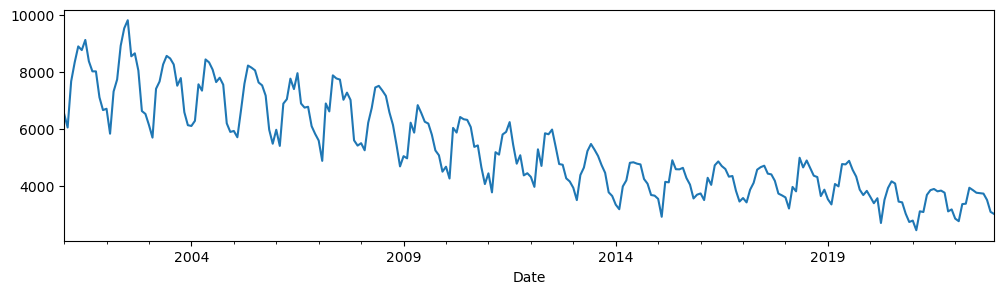

In [12]:
#Visualize Battery
crime_sizes.loc['BATTERY'].plot();

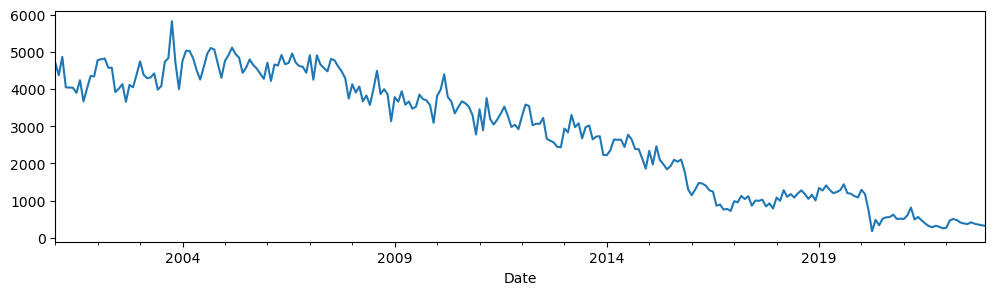

In [13]:
#Visualize Narcotics
crime_sizes.loc['NARCOTICS'].plot();

## Battery

In [14]:
#Create a ts for battery
battery = dff[dff['Primary Type'] == 'BATTERY']
batteryts = battery.resample('MS').size()
batteryts.head()

Date
2001-01-01    6527
2001-02-01    6042
2001-03-01    7662
2001-04-01    8328
2001-05-01    8887
Freq: MS, dtype: int64

In [15]:
#Check for nulls 
batteryts.isna().sum()

0

* **There are no nulls to impute**

### Determine Seasonality

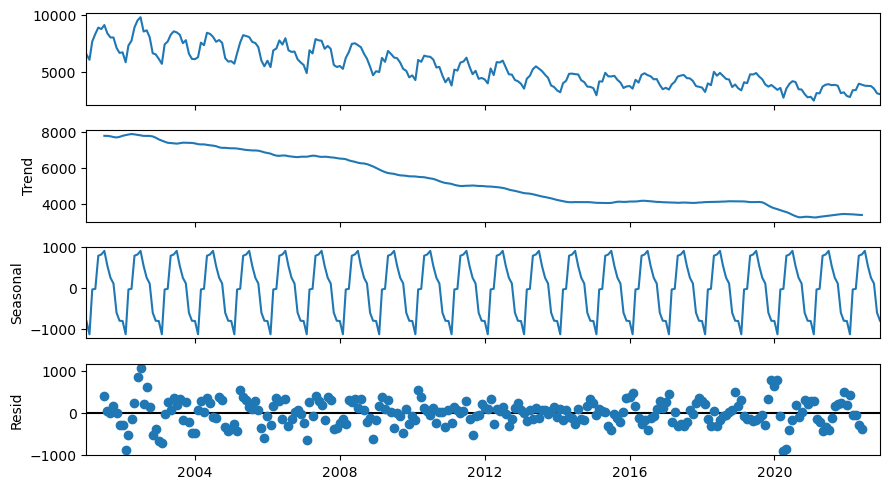

In [16]:
## Use Seasonal Decompose to check for seasonality
decomp_battery= tsa.seasonal_decompose(batteryts)
fig = decomp_battery.plot()
fig.set_size_inches(9, 5)
fig.tight_layout()

In [17]:
# How big is the seasonal component
battery_delta = decomp_battery.seasonal.max() - decomp_battery.seasonal.min()

# How big is the seasonal component relative to the time series?
print(f"The seasonal component is {battery_delta} which is ~{battery_delta/(batteryts.max()-batteryts.min()) * 100 :.2f}% of the variation in time series.")


The seasonal component is 2040.128968253968 which is ~27.70% of the variation in time series.


In [18]:
seasonal = decomp_battery.seasonal
peaks, props = find_peaks(seasonal, height=seasonal.max())

In [19]:
peak_dates = seasonal.index[peaks]
peak_dates

DatetimeIndex(['2001-07-01', '2002-07-01', '2003-07-01', '2004-07-01',
               '2005-07-01', '2006-07-01', '2007-07-01', '2008-07-01',
               '2009-07-01', '2010-07-01', '2011-07-01', '2012-07-01',
               '2013-07-01', '2014-07-01', '2015-07-01', '2016-07-01',
               '2017-07-01', '2018-07-01', '2019-07-01', '2020-07-01',
               '2021-07-01', '2022-07-01'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [20]:
period = peak_dates[1] - peak_dates[0]
period

Timedelta('365 days 00:00:00')

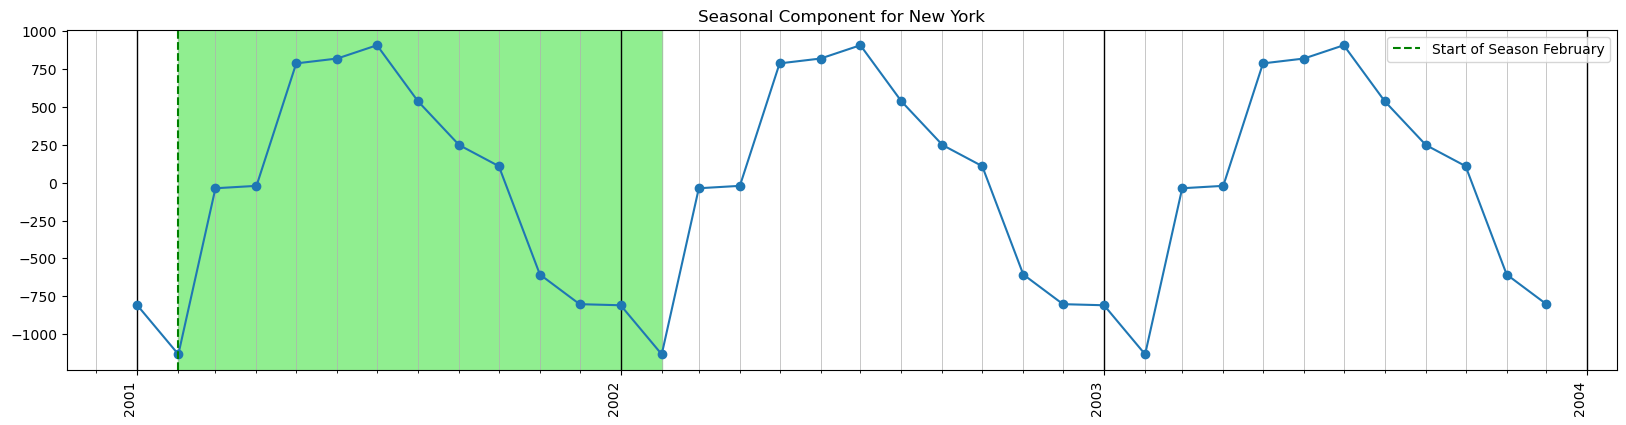

In [21]:
plt.rcParams['figure.figsize']=(20,5)

fig, ax = plot_seasonal(seasonal.loc['2001':'2003'])
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_locator(mdates.YearLocator(1))
plt.xticks(rotation=90, ha='right')
season_start = seasonal.idxmin()
ax.axvspan( season_start, season_start +period, color='lightgreen')
ax.axvline(season_start, color='green', ls='--',
           label=f"Start of Season {season_start.strftime('%B')}")
ax.legend();

* **There is a clear rise and fall of approximately 2040 crimes**
* **The seasonal component appears to have significance, so will use SARIMA**
* **There are 12 points between peaks, so m=12**

### Check for Stationarity and Differencing

In [22]:
# Check for stationarity
get_adfuller_results(batteryts)

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,-1.036843,15,248,0.739591,0.05,False


* **Stationarity is False, so time series will need differencing**

In [23]:
# determine d
d = ndiffs(batteryts)
print (f'd = {d}')
# determine D
D = nsdiffs(batteryts, m = 12)
print (f'D = {D}')


d = 1
D = 0


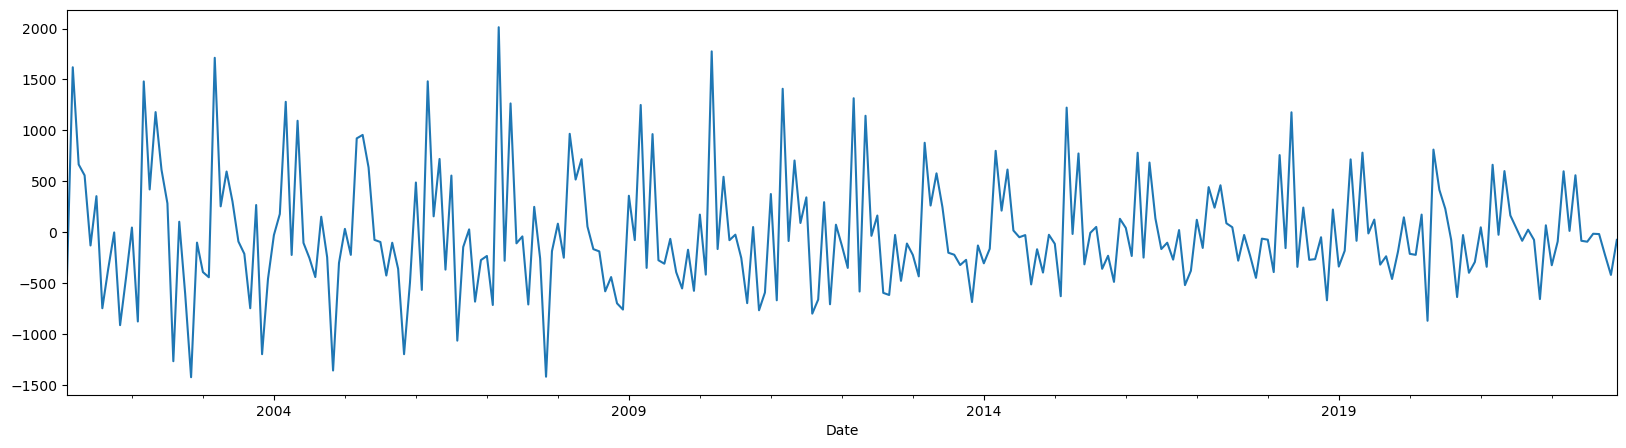

In [24]:
# Apply differencing
battery_diff = batteryts.diff().dropna()
battery_diff.plot();

### Estimate Model Order

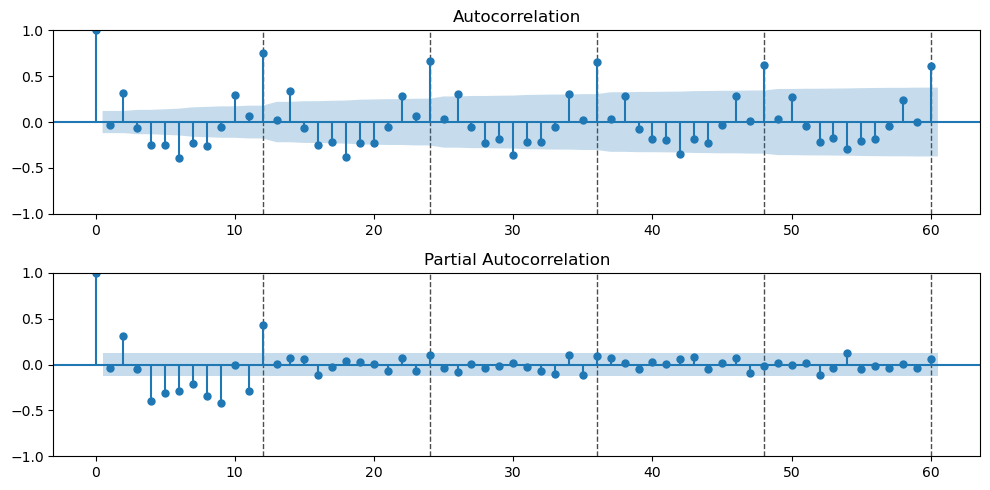

In [25]:
# Look at the acf/pacf of the stationary data
plot_acf_pacf(battery_diff, annotate_seas = True, m = 12, nlags = 60);

* **For p and q:**
    * ACF is looks like there might be a drop off at lag 2
    * PACF looks like it may also be a drop off at lag 2
    * The data is complicated and difficult to interpret
    * Will start with p=2 and q=2

* **For P and Q:**
    * ACF has a gradual decrease
    * PACF has a drop at lag 1
    * Will start with P=0 and Q=1

***Order: (2,1,2)(0,0,1)[12]

### Train Test Split and Fit Model

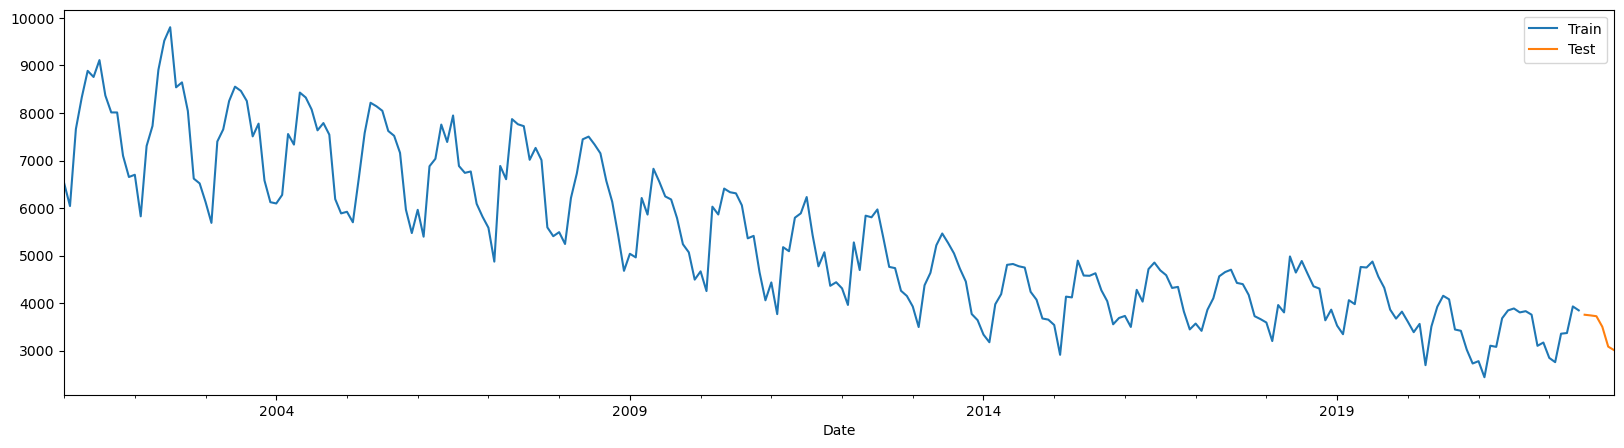

In [26]:
# tts of original data
train, test = train_test_split(batteryts, test_size=6)
ax = train.plot(label='Train')
test.plot(ax=ax, label='Test')
ax.legend();

In [27]:
#Fit model

# Orders for non seasonal components
p = 2  # nonseasonal AR
d = 1  # nonseasonal differencing
q = 2  # nonseasonal MA

# Orders for seasonal components
P = 0  # Seasonal AR
D = 0  # Seasonal differencing
Q = 1  # Seasonal MA
m = 12 # Seasonal period

bat_sarima = tsa.ARIMA(train, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()



### Evaluate Model

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 389.557
- MSE = 218,879.921
- RMSE = 467.846
- R^2 = -1.261
- MAPE = 12.00%


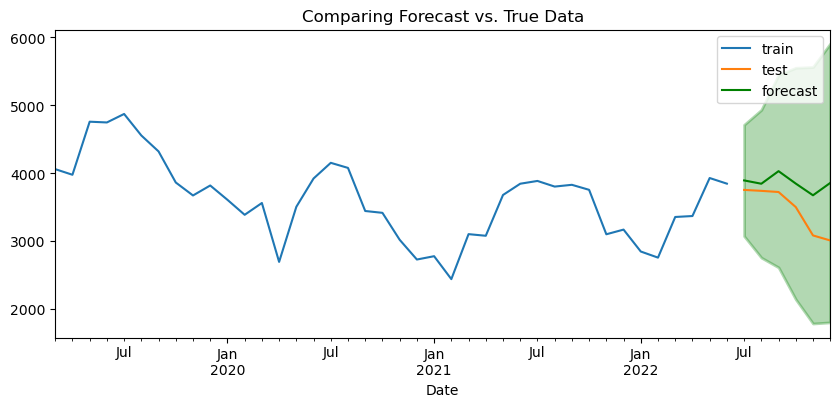

In [28]:
# Obtain summary of forecast as dataframe
bat_forecast = bat_sarima.get_forecast(len(test)).summary_frame()
# Plot the forecast with true values
plot_forecast(train, test, bat_forecast,  n_train_lags=40)
# Obtain metrics
regression_metrics_ts(test, bat_forecast["mean"])

In [29]:
# Obtain summary
bat_sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  258
Model:             ARIMA(2, 1, 2)x(0, 0, [1], 12)   Log Likelihood               -1918.724
Date:                            Fri, 01 Dec 2023   AIC                           3849.449
Time:                                    23:23:25   BIC                           3870.743
Sample:                                01-01-2001   HQIC                          3858.012
                                     - 06-01-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1597      0.088     -1.825      0.068      -0.331       0.012
ar.L2         -0.6806      0.075     -9.036      0.000      -0.828      -0.533
ma.L1          0.0324      0.055      0.589      0.556      -0.075       0.140
ma.L2          0.8946      0.043     20.820      0.000       0.810       0.979
ma.S.L12       0.6300      0.053     11.788      0.000       0.525       0.735
sigma2      1.754e+05   1.41e+04     12.408      0.000    1.48e+05    2.03e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 6.06
Prob(Q):                              0.91   Prob(JB):                         0.05
Heteroskedasticity (H):               0.35   Skew:                             0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

*  Looking at MAPE and the coefficients, the model shows a possible need to change the variables for AR and MA

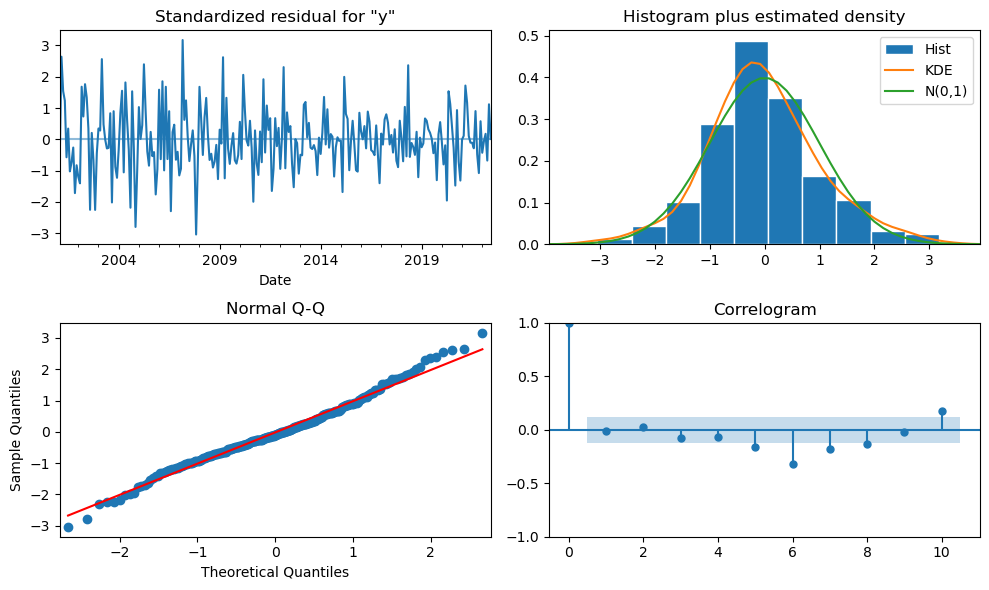

In [30]:
# Obtain diagnostic plots
fig = bat_sarima.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()


* The Correlogram shows some autocorrelation in residuals.
* Will need to try some other parameters

### Tune Model with auto_arima

In [31]:
# Default auto_arima will select model based on AIC score
bat_auto_model = pm.auto_arima(
    train,
    seasonal=True,
    m=12,
    d=1,
    trace=True
)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.98 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3999.181, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3753.329, Time=0.25 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3872.017, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3997.267, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=4000.706, Time=0.04 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=3680.737, Time=0.49 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=3870.170, Time=0.22 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.04 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=3682.671, Time=0.87 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=3836.662, Time=0.40 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=1.20 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=3704.855, Time=0.42 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : 

*  The best fit model is (2,1,0)(1,0,1)[12]

In [32]:
bat_auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  258
Model:             SARIMAX(2, 1, 0)x(1, 0, [1], 12)   Log Likelihood               -1833.518
Date:                              Fri, 01 Dec 2023   AIC                           3677.037
Time:                                      23:23:50   BIC                           3694.782
Sample:                                  01-01-2001   HQIC                          3684.173
                                       - 06-01-2022                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3590      0.056     -6.388      0.000      -0.469      -0.249
ar.L2         -0.1261      0.055     -2.290      0.022      -0.234      -0.018
ar.S.L12       0.9840      0.006    169.145      0.000       0.973       0.995
ma.S.L12      -0.6853      0.057    -12.115      0.000      -0.796      -0.574
sigma2      8.026e+04   6989.131     11.484      0.000    6.66e+04     9.4e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.84
Prob(Q):                              0.94   Prob(JB):                         0.40
Heteroskedasticity (H):               0.42   Skew:                             0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

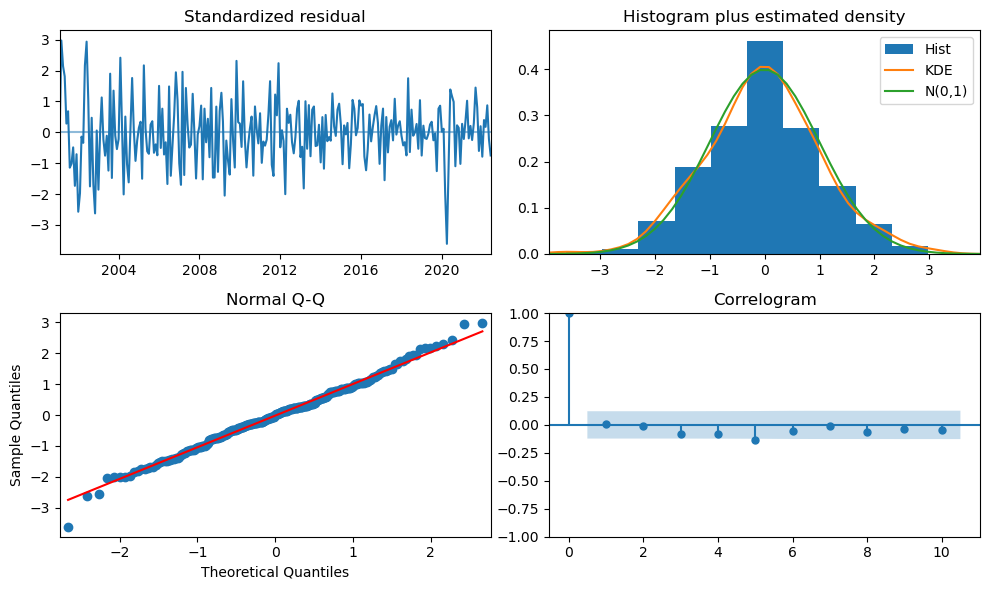

In [33]:
# Obtain diagnostic plots
fig = bat_auto_model.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()


In [34]:
# Use auto_arima parameters to fit an ARIMA
bat_auto_model = tsa.ARIMA(train, order=bat_auto_model.order, 
    seasonal_order=bat_auto_model.seasonal_order).fit()

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 95.188
- MSE = 17,440.524
- RMSE = 132.063
- R^2 = 0.820
- MAPE = 2.61%


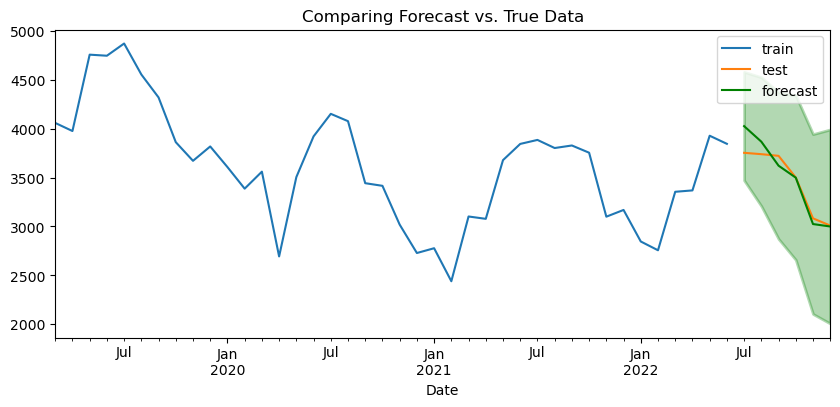

In [35]:
# Obtain forecast as a dataframe with confidence intervals
bat_forecast_auto = bat_auto_model.get_forecast(steps=len(test)).summary_frame()
# Call the custom function to plot the forecasts with confidence intervals and true values
plot_forecast(train, test, bat_forecast_auto, n_train_lags=40);
# Obtain metrics
regression_metrics_ts(test, bat_forecast_auto['mean'])

### Compare Models Side by Side Metrics

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-iqvr{background-color:#FFF;border-color:inherit;color:rgba(0, 0, 0, 0.87);text-align:right;vertical-align:middle}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-c6of{background-color:#ffffff;border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-6z5m{background-color:#FFF;border-color:inherit;color:rgba(0, 0, 0, 0.87);font-weight:bold;text-align:right;
  vertical-align:middle}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0pky"></th>
    <th class="tg-0pky" colspan="4">ARIMA(2, 1, 2)x(0, 0, [1], 12)</th>
    <th class="tg-c6of"></th>
    <th class="tg-iqvr" colspan="4">SARIMAX(2, 1, 0)x(1, 0, [1], 12)</th>
    <th class="tg-c6of"></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky"></td>
    <td class="tg-0pky">-</td>
    <td class="tg-0pky">MAE</td>
    <td class="tg-0pky">=</td>
    <td class="tg-0pky">389.557</td>
    <td class="tg-c6of"></td>
    <td class="tg-0pky">-</td>
    <td class="tg-0pky">MAE</td>
    <td class="tg-0pky">=</td>
    <td class="tg-0pky">95.188</td>
    <td class="tg-c6of">x</td>
  </tr>
  <tr>
    <td class="tg-0pky"></td>
    <td class="tg-0pky">-</td>
    <td class="tg-0pky">MSE</td>
    <td class="tg-0pky">=</td>
    <td class="tg-0pky">218,879.921</td>
    <td class="tg-c6of"></td>
    <td class="tg-0pky">-</td>
    <td class="tg-0pky">MSE</td>
    <td class="tg-0pky">=</td>
    <td class="tg-0pky">17,440.524</td>
    <td class="tg-c6of">x</td>
  </tr>
  <tr>
    <td class="tg-0pky"></td>
    <td class="tg-0pky">-</td>
    <td class="tg-0pky">RMSE</td>
    <td class="tg-0pky">=</td>
    <td class="tg-0pky">467.846</td>
    <td class="tg-c6of"></td>
    <td class="tg-0pky">-</td>
    <td class="tg-0pky">RMSE</td>
    <td class="tg-0pky">=</td>
    <td class="tg-0pky">132.063</td>
    <td class="tg-c6of">x</td>
  </tr>
  <tr>
    <td class="tg-0pky"></td>
    <td class="tg-0pky">-</td>
    <td class="tg-0pky">R^2</td>
    <td class="tg-0pky">=</td>
    <td class="tg-0pky">-1.261</td>
    <td class="tg-c6of"></td>
    <td class="tg-0pky">-</td>
    <td class="tg-0pky">R^2</td>
    <td class="tg-0pky">=</td>
    <td class="tg-0pky">0.820</td>
    <td class="tg-c6of">x</td>
  </tr>
  <tr>
    <td class="tg-0pky"></td>
    <td class="tg-0pky">-</td>
    <td class="tg-0pky">MAPE</td>
    <td class="tg-0pky">=</td>
    <td class="tg-0pky">12.00%</td>
    <td class="tg-c6of"></td>
    <td class="tg-0pky">-</td>
    <td class="tg-0pky">MAPE</td>
    <td class="tg-0pky">=</td>
    <td class="tg-0pky">2.61%</td>
    <td class="tg-c6of">x</td>
  </tr>
  <tr>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-6z5m"><span style="font-weight:bold">AIC</span></td>
    <td class="tg-iqvr">3849.449</td>
    <td class="tg-0pky"></td>
    <td class="tg-c6of"></td>
    <td class="tg-0pky"></td>
    <td class="tg-6z5m"><span style="font-weight:bold">AIC</span></td>
    <td class="tg-iqvr">3677.037</td>
    <td class="tg-0pky"></td>
    <td class="tg-c6of">x</td>
  </tr>
  <tr>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-6z5m"><span style="font-weight:bold">BIC</span></td>
    <td class="tg-iqvr">3870.743</td>
    <td class="tg-0pky"></td>
    <td class="tg-c6of"></td>
    <td class="tg-0pky"></td>
    <td class="tg-6z5m"><span style="font-weight:bold">BIC</span></td>
    <td class="tg-iqvr">3694.782</td>
    <td class="tg-0pky"></td>
    <td class="tg-c6of">x</td>
  </tr>
  <tr>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-c6of"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-c6of"></td>
  </tr>
  <tr>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-c6of"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
  </tr>
</tbody>
</table>

*  Looking at these metrics the auto_arima model performed better on all aspects. It also fixed the autocorrelation that the correlogram was showing in the original model. 

### Make Future Forecasts

***Using this model:  SARIMAX(2, 1, 0)x(1, 0, [1], 12)***

In [36]:
# These are the parameters of our final model
# Orders for non seasonal components
p = 2  # nonseasonal AR
d = 1  # nonseasonal differencing
q = 0  # nonseasonal MA

# Orders for seasonal components
P = 1  # Seasonal AR
D = 0  # Seasonal differencing
Q = 1  # Seasonal MA
m = 12 # Seasonal period

final_bat_model = tsa.ARIMA(batteryts, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()



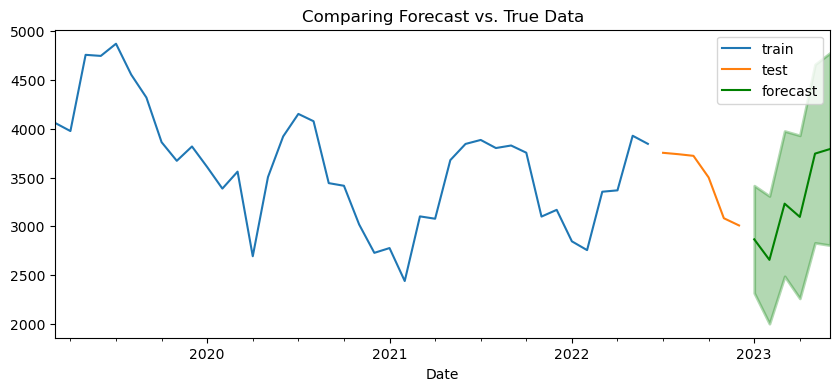

In [37]:
# Obtain future forecasts beyond test data
battery_forecast  = final_bat_model.get_forecast(len(test)).summary_frame()
plot_forecast(train,test,battery_forecast, n_train_lags=40);

### Summarize Forecast

In [38]:
battery_forecast.index[0], battery_forecast.index[-1]

(Timestamp('2023-01-01 00:00:00', freq='MS'),
 Timestamp('2023-06-01 00:00:00', freq='MS'))

In [39]:
starting_bat = battery_forecast['mean'].iloc[0]
starting_bat

2866.591653431155

In [40]:
final_bat = battery_forecast['mean'].iloc[-1]
final_bat

3793.4864963484542

In [41]:
#Calculate the predicted net change in the number (raw counts) of this type of crime
#from the beginning of the forecast to the end.
       
battery_change = final_bat - starting_bat
battery_change

926.8948429172992

In [42]:
#Convert the raw delta into a percent change.
battery_pct= (battery_change/starting_bat) * 100
battery_pct

32.33438713909099

* **There is a change of 927 battery crimes over the next 6 months**
* **This is a 32% increase in battery.**

## Narcotics

In [43]:
#Create a ts for narcotics
narcts = dff[dff['Primary Type'] == 'NARCOTICS']
narcts = narcts.resample('MS').size()
narcts.head()

Date
2001-01-01    4714
2001-02-01    4369
2001-03-01    4862
2001-04-01    4044
2001-05-01    4038
Freq: MS, dtype: int64

In [44]:
#check for nulls
narcts.isna().sum()

0

* **There are no null values to impute**

### Determine Seasonality

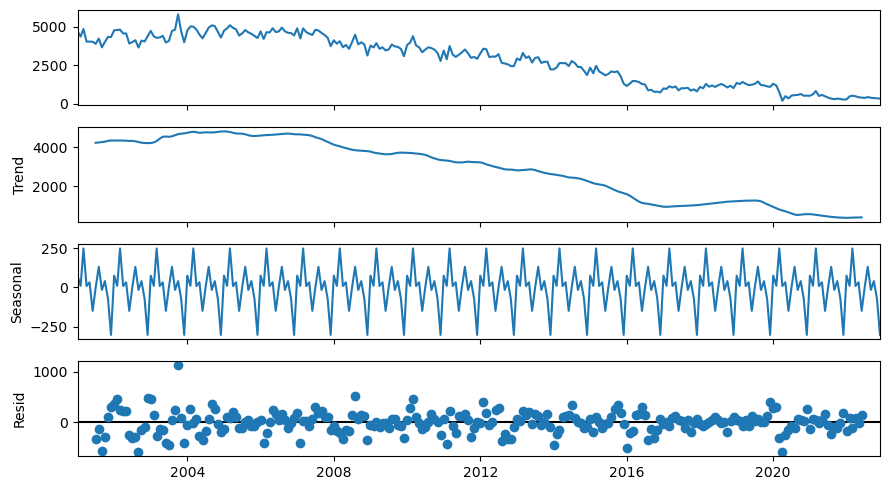

In [45]:
## Use Seasonal Decompose to check for seasonality
decomp_narc= tsa.seasonal_decompose(narcts)
fig = decomp_narc.plot()
fig.set_size_inches(9, 5)
fig.tight_layout()

In [46]:
# How big is the seasonal component
narc_delta = decomp_narc.seasonal.max() - decomp_narc.seasonal.min()

# How big is the seasonal component relative to the time series?
print(f"The seasonal component is {narc_delta} which is ~{narc_delta/(narcts.max()-narcts.min()) * 100 :.2f}% of the variation in time series.")


The seasonal component is 550.6626984126985 which is ~9.76% of the variation in time series.


In [47]:
seasonal = decomp_narc.seasonal
peaks, props = find_peaks(seasonal, height=seasonal.max())

In [48]:
peak_dates = seasonal.index[peaks]
peak_dates

DatetimeIndex(['2001-03-01', '2002-03-01', '2003-03-01', '2004-03-01',
               '2005-03-01', '2006-03-01', '2007-03-01', '2008-03-01',
               '2009-03-01', '2010-03-01', '2011-03-01', '2012-03-01',
               '2013-03-01', '2014-03-01', '2015-03-01', '2016-03-01',
               '2017-03-01', '2018-03-01', '2019-03-01', '2020-03-01',
               '2021-03-01', '2022-03-01'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [49]:
period = peak_dates[1] - peak_dates[0]
period

Timedelta('365 days 00:00:00')

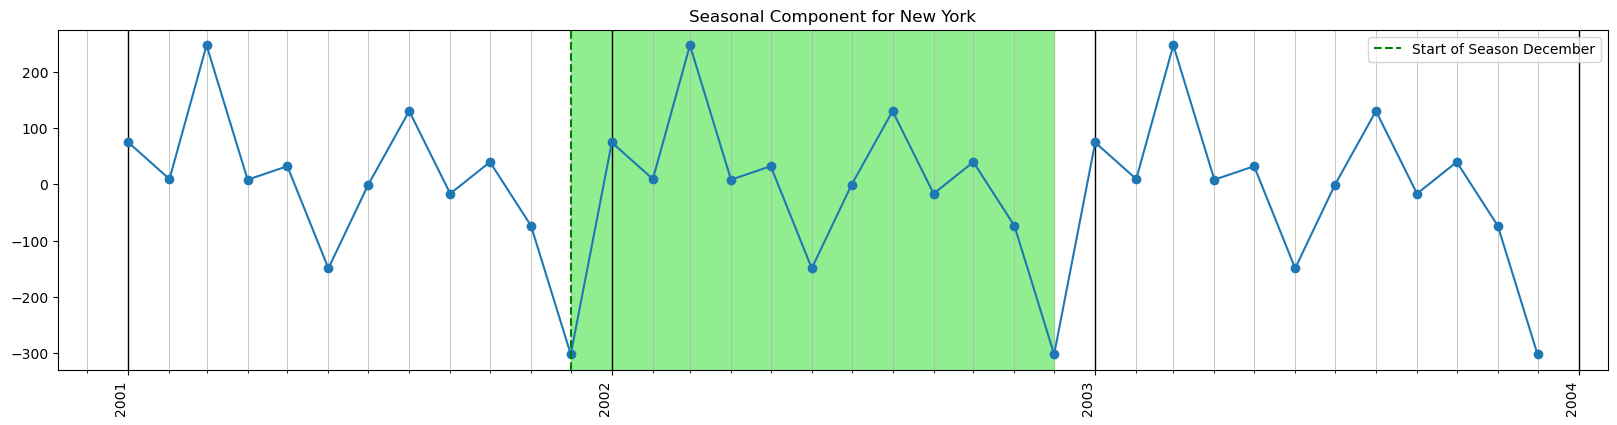

In [50]:
plt.rcParams['figure.figsize']=(20,5)

fig, ax = plot_seasonal(seasonal.loc['2001':'2003'])
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_locator(mdates.YearLocator(1))
plt.xticks(rotation=90, ha='right')
season_start = seasonal.idxmin()
ax.axvspan( season_start, season_start +period, color='lightgreen')
ax.axvline(season_start, color='green', ls='--',
           label=f"Start of Season {season_start.strftime('%B')}")
ax.legend();

* **There is a rise and fall of approximately 550 crimes over accounting for around 10% of narcotics data**
* **The seasonal component appears to have little to no significance, so will use ARIMA without seasonal component**


### Check for Stationarity and Differencing

In [51]:
# Check for stationarity
get_adfuller_results(narcts)

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,0.265472,12,251,0.975704,0.05,False


* **Stationarity is False, so time series will need differencing**

In [52]:
# determine d
d = ndiffs(narcts)
print (f'd = {d}')

d = 1


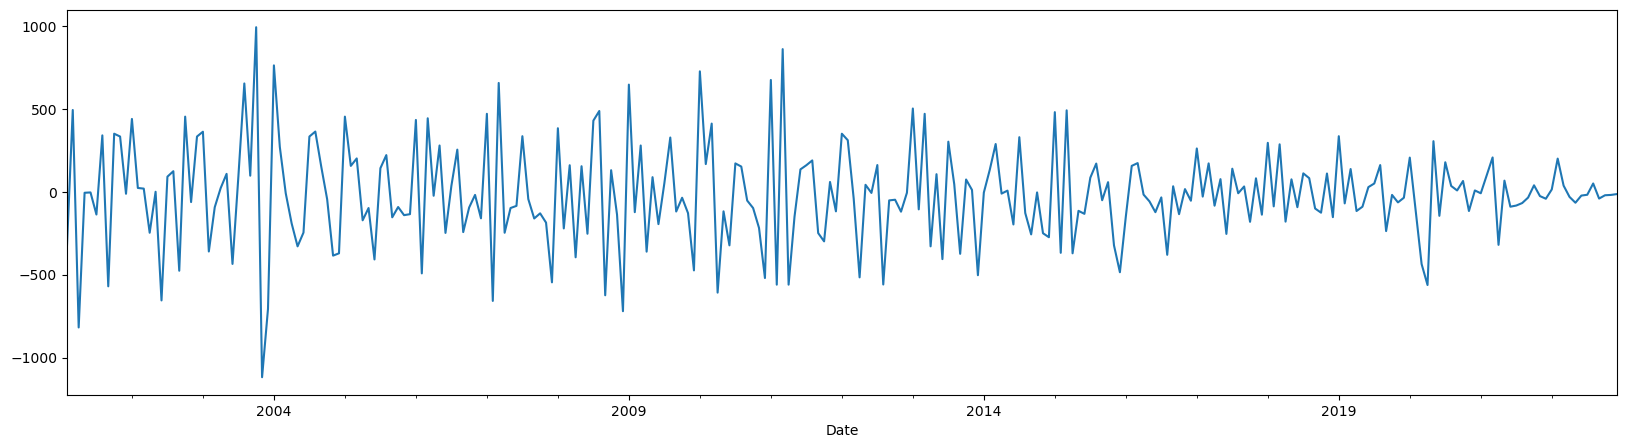

In [53]:
# Apply differencing
narc_diff = narcts.diff().dropna()
narc_diff.plot();

### Estimate Model Order

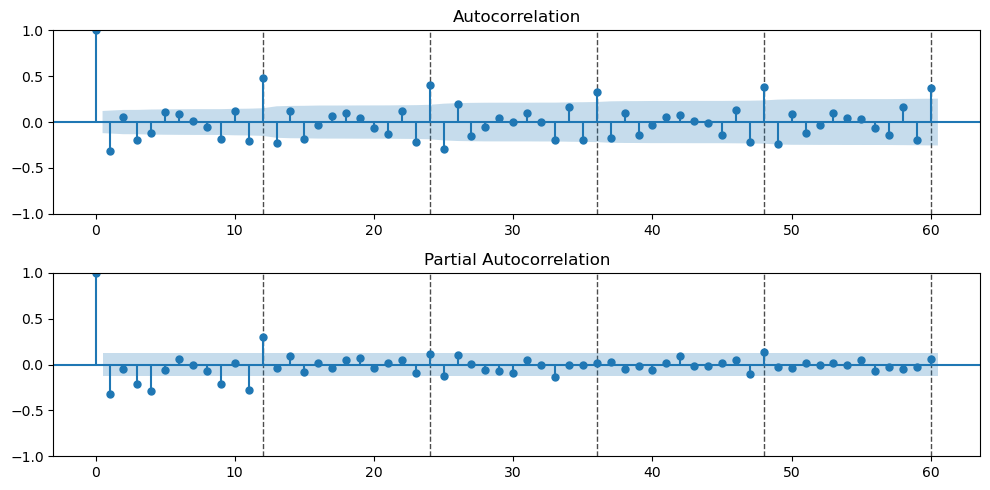

In [54]:
# Look at the acf/pacf of the stationary data
plot_acf_pacf(narc_diff, annotate_seas = True, m = 12, nlags = 60);

* **For p and q:**
    * ACF is looks like there might be a drop off at lag 1
    * PACF looks like it may also be a drop off at lag 1
    * The data is complicated and difficult to interpret
    * Will start with p=1 and q=1

### Train Test Split and Fit Model

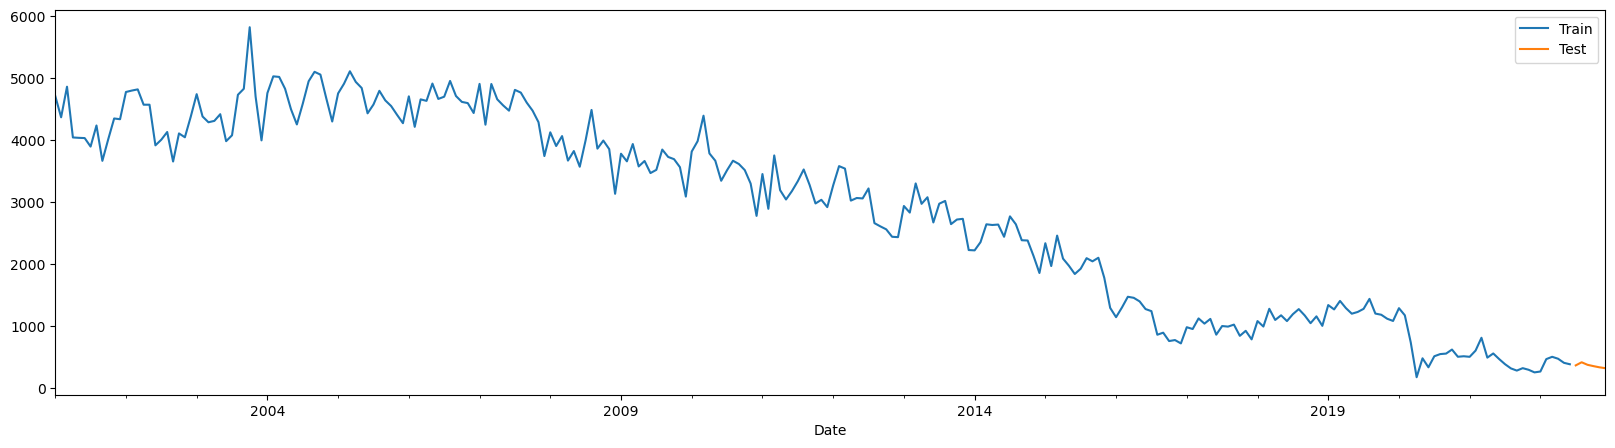

In [55]:
# tts of original data
train, test = train_test_split(narcts, test_size=6)
ax = train.plot(label='Train')
test.plot(ax=ax, label='Test')
ax.legend();

In [56]:
#Fit model

# Orders for non seasonal components
p = 1  # nonseasonal AR
d = 1  # nonseasonal differencing
q = 1  # nonseasonal MA

narc_arma = tsa.ARIMA(train, order = (p,d,q)).fit()


### Evaluate Model

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 44.191
- MSE = 2,472.482
- RMSE = 49.724
- R^2 = -1.663
- MAPE = 12.67%


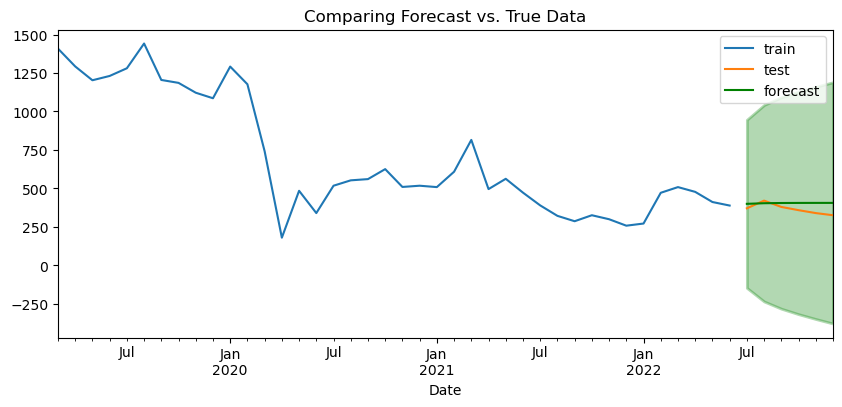

In [76]:
# Obtain summary of forecast as dataframe
narc_forecast = narc_arma.get_forecast(len(test)).summary_frame()
# Plot the forecast with true values
plot_forecast(train, test, narc_forecast,  n_train_lags=40)
# Obtain metrics
regression_metrics_ts(test, narc_forecast["mean"])

In [58]:
# Obtain summary
narc_arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  258
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1811.671
Date:                Fri, 01 Dec 2023   AIC                           3629.342
Time:                        23:23:55   BIC                           3639.989
Sample:                    01-01-2001   HQIC                          3633.623
                         - 06-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3570      0.093      3.851      0.000       0.175       0.539
ma.L1         -0.7523      0.070    -10.710      0.000      -0.890      -0.615
sigma2      7.786e+04   5643.319     13.798      0.000    6.68e+04    8.89e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.40   Jarque-Bera (JB):                18.70
Prob(Q):                              0.53   Prob(JB):                         0.00
Heteroskedasticity (H):               0.31   Skew:                             0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

*  Looking at MAPE the model shows a possible need to change the variables for AR and MA

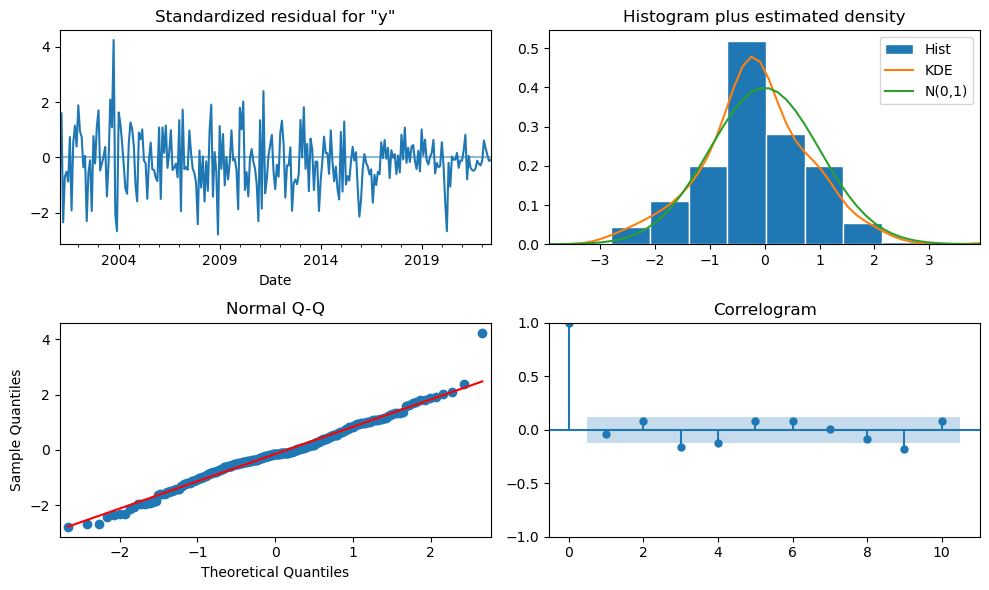

In [59]:
# Obtain diagnostic plots
fig = narc_arma.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()


* There is clearly some data fluctations that's not being accounted for by the model looking at Q-Q
* The Correlogram shows some autocorrelation in residuals.
* Will need to try some other parameters

### Tune Model with auto_arima

In [60]:
# Default auto_arima will select model based on AIC score
narc_auto_model = pm.auto_arima(train,
    seasonal=False,
    m=12,
    d=1,
    trace=True)

C:\Users\csbro\anaconda3\envs\dojo-env\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3669.016, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3643.189, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3635.953, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3667.813, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3624.808, Time=0.20 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3625.645, Time=0.30 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3626.257, Time=0.24 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3630.712, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3644.771, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3629.342, Time=0.10 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 1.506 seconds


*  The best fit model is (1,1,1)(0,0,0)[0]

* This is the same as the original model

* Will rerun both models using seasonality

## Rerun of Narcotics With Seasonality

### Test for Stationarity and Differencing

***AdFuller test already shows dataset was False for stationarity***

In [61]:
# determine d
d = ndiffs(narcts)
print (f'd = {d}')
# determine D
D = nsdiffs(narcts, m = 12)
print (f'D = {D}')

d = 1
D = 0


In [62]:
# Verify stationarity
get_adfuller_results(narc_diff)

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,-5.393766,11,251,0.000003,0.05,True


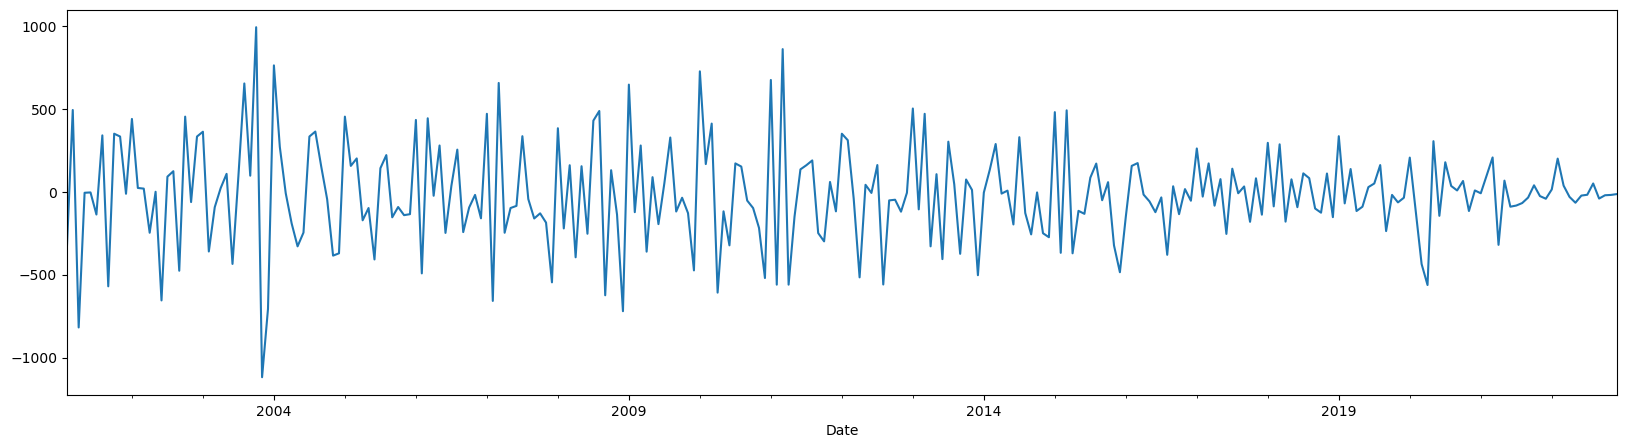

In [63]:
# Apply differencing
narc_diff = narcts.diff().dropna()
narc_diff.plot();

### Estimate Model Order

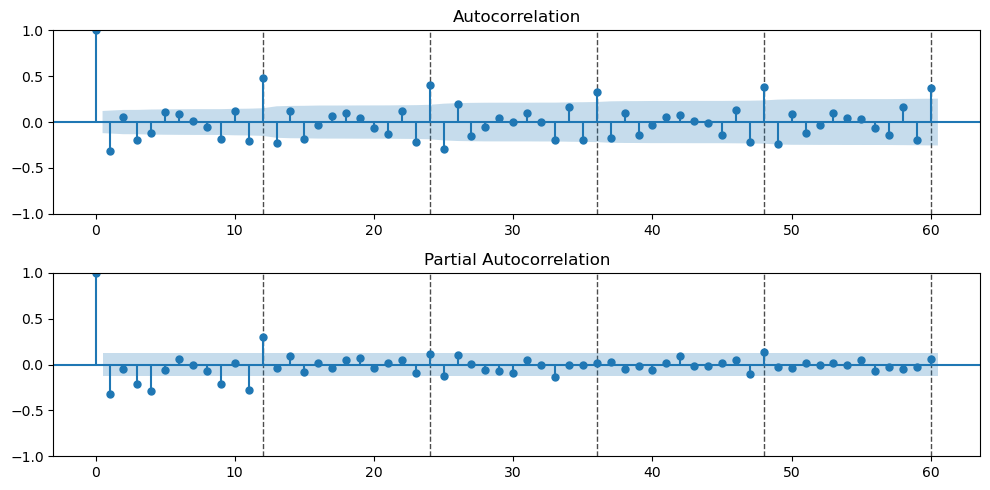

In [64]:
# Look at the acf/pacf of the stationary data
plot_acf_pacf(narc_diff, annotate_seas = True, m = 12, nlags = 60);

* **For p and q:**
    * ACF is looks like this might be gradual
    * PACF looks like it may also be a drop off at lag 4
    * The data is complicated and difficult to interpret
    * Will start with p=0 and q=4

* **For P and Q:**
    * ACF has a gradual decrease
    * PACF has a small drop at lag 1
    * Will start with P=1 and Q=0

***Order: (0,1,4)(1,0,0)[12]

### Train Test Split and Fit the Model

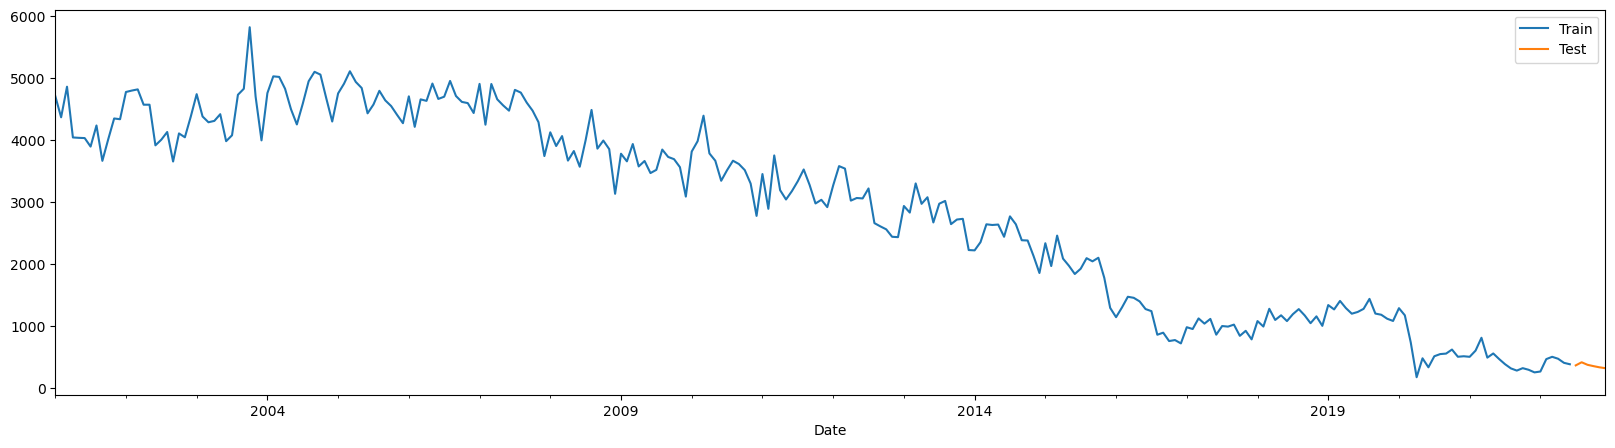

In [65]:
# tts of original data
train, test = train_test_split(narcts, test_size=6)
ax = train.plot(label='Train')
test.plot(ax=ax, label='Test')
ax.legend();

In [66]:
# These are the parameters of our final model
# Orders for non seasonal components
p = 0  # nonseasonal AR
d = 1  # nonseasonal differencing
q = 4  # nonseasonal MA

# Orders for seasonal components
P = 1  # Seasonal AR
D = 0  # Seasonal differencing
Q = 0  # Seasonal MA
m = 12 # Seasonal period

narc_smodel = tsa.ARIMA(narcts, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()

### Evaluate Model

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 43.568
- MSE = 2,292.245
- RMSE = 47.877
- R^2 = -1.469
- MAPE = 12.33%


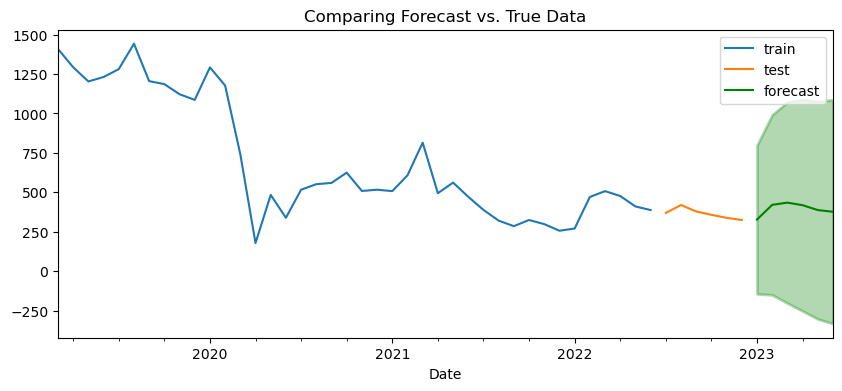

In [77]:
# Obtain summary of forecast as dataframe
narc_forecast2 = narc_smodel.get_forecast(len(test)).summary_frame()
# Plot the forecast with true values
plot_forecast(train, test, narc_forecast2,  n_train_lags=40)
# Obtain metrics
regression_metrics_ts(test, narc_forecast2["mean"])

In [68]:
# Obtain summary
narc_smodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  264
Model:             ARIMA(0, 1, 4)x(1, 0, [], 12)   Log Likelihood               -1815.664
Date:                           Fri, 01 Dec 2023   AIC                           3643.328
Time:                                   23:23:59   BIC                           3664.761
Sample:                               01-01-2001   HQIC                          3651.941
                                    - 12-01-2022                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3166      0.044     -7.180      0.000      -0.403      -0.230
ma.L2         -0.0823      0.047     -1.741      0.082      -0.175       0.010
ma.L3         -0.1560      0.060     -2.616      0.009      -0.273      -0.039
ma.L4         -0.0979      0.051     -1.908      0.056      -0.198       0.003
ar.S.L12       0.4689      0.052      8.988      0.000       0.367       0.571
sigma2      5.777e+04   3886.289     14.864      0.000    5.01e+04    6.54e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                33.64
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               0.34   Skew:                            -0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

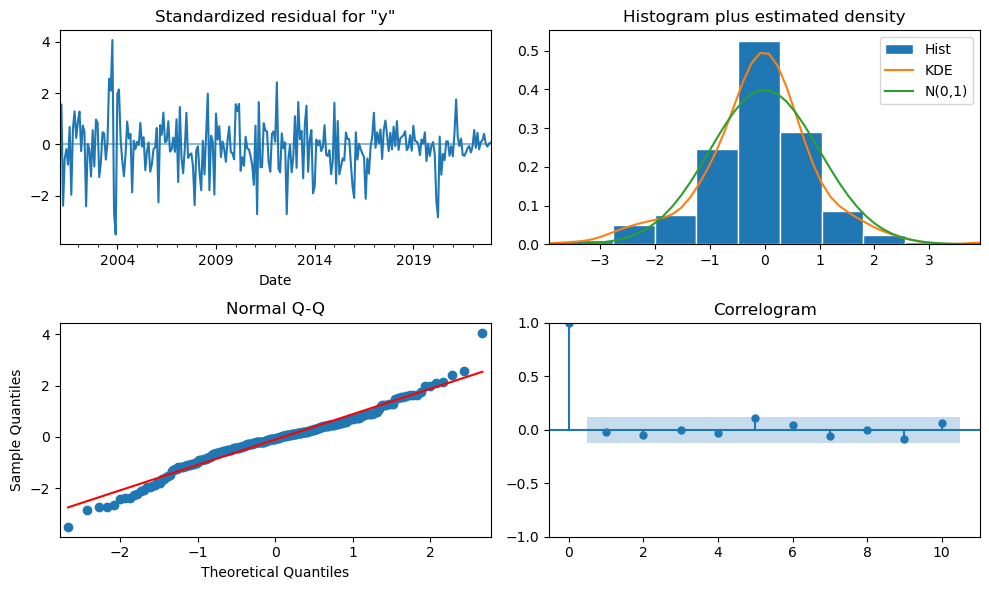

In [69]:
# Obtain diagnostic plots
fig = narc_smodel.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

* There is clearly some data fluctations that's not being accounted for by the model looking at Q-Q
* The Correlogram has improved autocorrelation in residuals.

### Tune Model with auto_arima

In [70]:
# Default auto_arima will select model based on AIC score
narc_auto_smodel = pm.auto_arima(train,
    seasonal=True,
    m=12,
    d=1,
    trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3669.016, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3583.957, Time=0.23 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3595.909, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3667.813, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=3643.189, Time=0.03 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=3577.354, Time=0.55 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=3559.635, Time=0.78 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=3559.679, Time=0.43 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=0.95 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=3559.353, Time=0.79 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=3589.825, Time=0.34 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=3602.922, Time=0.17 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=3566.698, Time=0.76 sec
 ARIMA(2,1,0)(1,0,2)[12] inte

In [71]:
narc_auto_smodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  258
Model:             SARIMAX(4, 1, 0)x(1, 0, [1], 12)   Log Likelihood               -1764.670
Date:                              Fri, 01 Dec 2023   AIC                           3543.341
Time:                                      23:24:34   BIC                           3568.184
Sample:                                  01-01-2001   HQIC                          3553.332
                                       - 06-01-2022                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2524      0.042     -5.976      0.000      -0.335      -0.170
ar.L2         -0.1862      0.053     -3.528      0.000      -0.290      -0.083
ar.L3         -0.2032      0.058     -3.488      0.000      -0.317      -0.089
ar.L4         -0.1967      0.061     -3.247      0.001      -0.315      -0.078
ar.S.L12       0.9384      0.032     29.749      0.000       0.877       1.000
ma.S.L12      -0.7208      0.081     -8.953      0.000      -0.879      -0.563
sigma2      5.296e+04   3683.361     14.379      0.000    4.57e+04    6.02e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                38.52
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.33   Skew:                            -0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

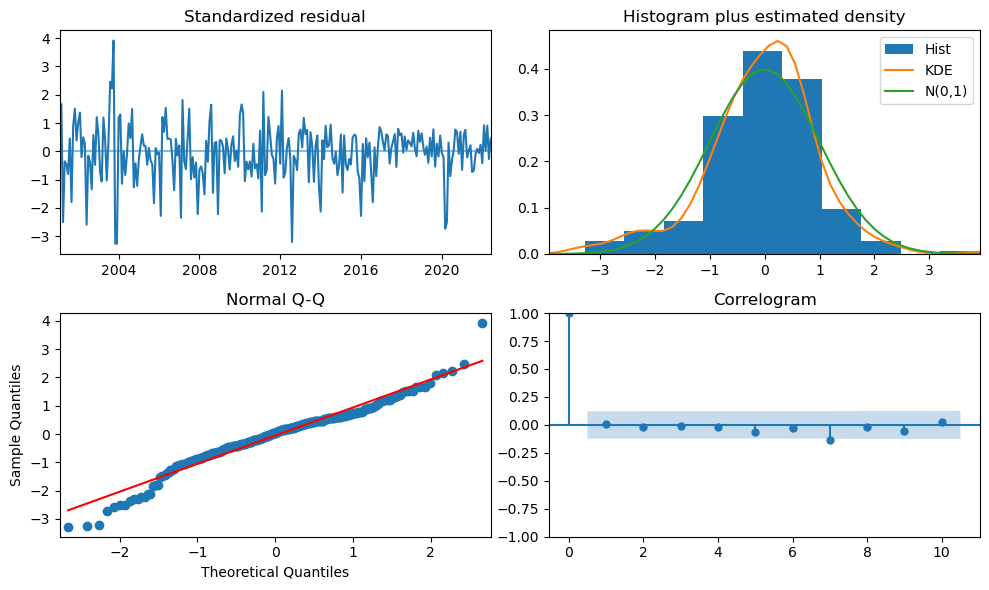

In [72]:
# Obtain diagnostic plots
fig = narc_auto_smodel.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()


In [78]:
# Use auto_arima parameters to fit an ARIMA
narc_auto_smodel = tsa.ARIMA(train, order=narc_auto_smodel.order).fit()

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 61.972
- MSE = 4,707.694
- RMSE = 68.613
- R^2 = -4.070
- MAPE = 17.68%


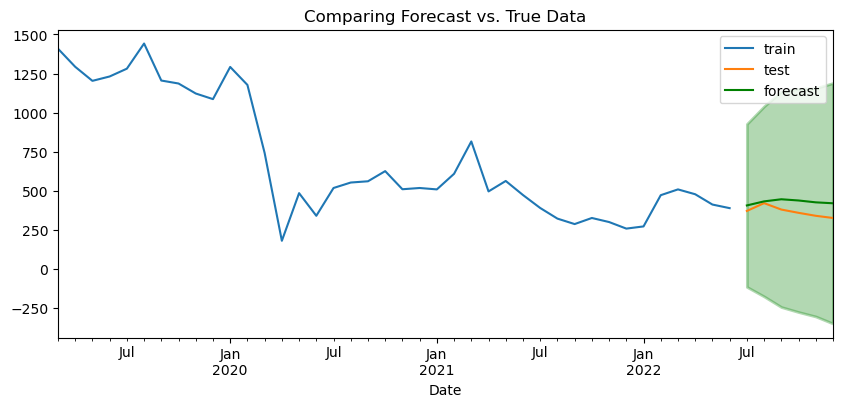

In [79]:
# Obtain forecast as a dataframe with confidence intervals
narc_forecast_auto = narc_auto_smodel.get_forecast(steps=len(test)).summary_frame()
# Call the custom function to plot the forecasts with confidence intervals and true values
plot_forecast(train, test, narc_forecast_auto, n_train_lags=40);
# Obtain metrics
regression_metrics_ts(test, narc_forecast_auto['mean'])

*  Looking at these metrics the auto_arima model performed about the same.

### Compare Models: Side by Side Metrics

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-40re{background-color:#FFF;border-color:inherit;color:rgba(0, 0, 0, 0.87);font-weight:bold;text-align:right;
  vertical-align:top}
.tg .tg-ma95{background-color:#FFF;border-color:inherit;color:rgba(0, 0, 0, 0.87);text-align:right;vertical-align:top}
.tg .tg-zv36{background-color:#ffffff;border-color:inherit;font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-iqvr{background-color:#FFF;border-color:inherit;color:rgba(0, 0, 0, 0.87);text-align:right;vertical-align:middle}
.tg .tg-fymr{border-color:inherit;font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-6z5m{background-color:#FFF;border-color:inherit;color:rgba(0, 0, 0, 0.87);font-weight:bold;text-align:right;
  vertical-align:middle}
.tg .tg-c6of{background-color:#ffffff;border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-fymr" colspan="4">ARIMA (1,1,1)</th>
    <th class="tg-fymr"></th>
    <th class="tg-fymr" colspan="4">SARIMA(0,1,4)(1,0,0)[12]</th>
    <th class="tg-zv36"></th>
    <th class="tg-6z5m" colspan="4">SARIMAX (4,1,0)(1,0,1)[12]</th>
    <th class="tg-c6of"></th>
    <th class="tg-0pky"></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">-</td>
    <td class="tg-fymr">MAE</td>
    <td class="tg-0pky">=</td>
    <td class="tg-0pky">44.191</td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky">-</td>
    <td class="tg-fymr">MAE</td>
    <td class="tg-0pky">=</td>
    <td class="tg-0pky">43.568</td>
    <td class="tg-c6of">x</td>
    <td class="tg-0pky">-</td>
    <td class="tg-fymr">MAE</td>
    <td class="tg-0pky">=</td>
    <td class="tg-0pky">61.972</td>
    <td class="tg-c6of"></td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">-</td>
    <td class="tg-fymr">MSE</td>
    <td class="tg-0pky">=</td>
    <td class="tg-0pky">2,472.482</td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky">-</td>
    <td class="tg-fymr">MSE</td>
    <td class="tg-0pky">=</td>
    <td class="tg-0pky">2,292.245</td>
    <td class="tg-c6of">x</td>
    <td class="tg-0pky">-</td>
    <td class="tg-fymr">MSE</td>
    <td class="tg-0pky">=</td>
    <td class="tg-0pky">4,707.694</td>
    <td class="tg-c6of"></td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">-</td>
    <td class="tg-fymr">RMSE</td>
    <td class="tg-0pky">=</td>
    <td class="tg-0pky">49.724</td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky">-</td>
    <td class="tg-fymr">RMSE</td>
    <td class="tg-0pky">=</td>
    <td class="tg-0pky">47.877</td>
    <td class="tg-c6of">x</td>
    <td class="tg-0pky">-</td>
    <td class="tg-fymr">RMSE</td>
    <td class="tg-0pky">=</td>
    <td class="tg-0pky">68.613</td>
    <td class="tg-c6of"></td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">-</td>
    <td class="tg-fymr">R^2</td>
    <td class="tg-0pky">=</td>
    <td class="tg-0pky">-1.663</td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky">-</td>
    <td class="tg-fymr">R^2</td>
    <td class="tg-0pky">=</td>
    <td class="tg-0pky">-1.469</td>
    <td class="tg-c6of">x</td>
    <td class="tg-0pky">-</td>
    <td class="tg-fymr">R^2</td>
    <td class="tg-0pky">=</td>
    <td class="tg-0pky">-4.070</td>
    <td class="tg-c6of"></td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">-</td>
    <td class="tg-fymr">MAPE</td>
    <td class="tg-0pky">=</td>
    <td class="tg-0pky">12.67%</td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky">-</td>
    <td class="tg-fymr">MAPE</td>
    <td class="tg-0pky">=</td>
    <td class="tg-0pky">12.33%</td>
    <td class="tg-c6of">x</td>
    <td class="tg-0pky">-</td>
    <td class="tg-fymr">MAPE</td>
    <td class="tg-0pky">=</td>
    <td class="tg-0pky">17.68%</td>
    <td class="tg-c6of"></td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-40re"></td>
    <td class="tg-40re"><span style="font-weight:bold">AIC</span></td>
    <td class="tg-ma95">3629.342</td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-6z5m"><span style="font-weight:bold">AIC</span></td>
    <td class="tg-iqvr">3643.328</td>
    <td class="tg-0pky"></td>
    <td class="tg-c6of"></td>
    <td class="tg-0pky"></td>
    <td class="tg-6z5m"><span style="font-weight:bold">AIC</span></td>
    <td class="tg-iqvr">3543.341</td>
    <td class="tg-0pky"></td>
    <td class="tg-c6of">x</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-40re"></td>
    <td class="tg-40re"><span style="font-weight:bold">BIC</span></td>
    <td class="tg-ma95">3639.989</td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-6z5m"><span style="font-weight:bold">BIC</span></td>
    <td class="tg-iqvr">3664.761</td>
    <td class="tg-0pky"></td>
    <td class="tg-c6of"></td>
    <td class="tg-0pky"></td>
    <td class="tg-6z5m"><span style="font-weight:bold">BIC</span></td>
    <td class="tg-iqvr">3568.184</td>
    <td class="tg-0pky"></td>
    <td class="tg-c6of">x</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-c6of"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-c6of"></td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-c6of"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
  </tr>
</tbody>
</table>ky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
  </tr>
</tbody>
</table>ky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
  </tr>
</tbody>
</table>

*  Looking at these metrics the auto_arima model performed better on AIC and BIC.
*  The auto_arima model Q-Q doesn't look as sharp
*  The original model with seasonality has the best MAPE at 12.52%, however there may be a way to improve this value.
*  To make future forecasts will use the origial model with seasonality.
  -  Although the auto_arima had a better AIC the difference is small
  -  This model has a significantly better MAPE value

### Make Future Forecasts

***Using this model:  SARIMA(0, 1, 4)x(1, 0, [0], 12)***

In [82]:
# These are the parameters of our final model
# Orders for non seasonal components
p = 0  # nonseasonal AR
d = 1  # nonseasonal differencing
q = 4  # nonseasonal MA

# Orders for seasonal components
P = 1  # Seasonal AR
D = 0  # Seasonal differencing
Q = 0  # Seasonal MA
m = 12 # Seasonal period

final_narc_model = tsa.ARIMA(narcts, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()

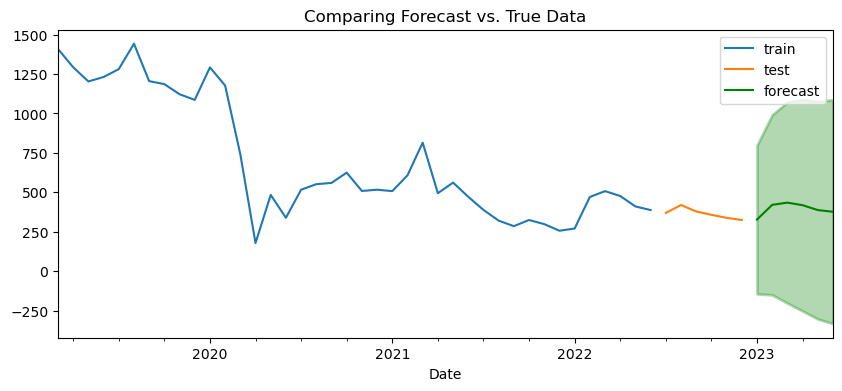

In [83]:
# Obtain future forecasts beyond test data
narcotics_forecast  = final_narc_model.get_forecast(len(test)).summary_frame()
plot_forecast(train,test,narcotics_forecast, n_train_lags=40);

### Summarize Forcast

In [84]:
narcotics_forecast.index[0], narcotics_forecast.index[-1]

(Timestamp('2023-01-01 00:00:00', freq='MS'),
 Timestamp('2023-06-01 00:00:00', freq='MS'))

In [85]:
starting_narc = narcotics_forecast['mean'].iloc[0]
starting_narc

327.8358248131415

In [86]:
final_narc = narcotics_forecast['mean'].iloc[-1]
final_narc

377.1654273021843

In [87]:
#Calculate the predicted net change in the number (raw counts) of this type of crime
#from the beginning of the forecast to the end.
       
narcotics_change = final_narc - starting_narc
narcotics_change

49.32960248904277

In [88]:
#Convert the raw delta into a percent change.
narcotics_pct= (narcotics_change/starting_narc) * 100
narcotics_pct

15.047044512953839

* **There is a change of about 49 narcotics crimes over the next 6 months**
* **This is a 15% increase in battery.**

## Questions:

1.  Of the two crimes, which is forecasted to have the highest monthly count of the crimes at the end of the forecast?  **Battery**
2.  Of the two crimes, which is forecasted to have the highest net change by the end of the forecast  **Battery**
3.  Of the two crimes, which is forecasted to have the highest percent change by the end of the forecast?  **Battery**

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-llyw{background-color:#c0c0c0;border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-f8tv{border-color:inherit;font-style:italic;text-align:left;vertical-align:top}
.tg .tg-fymr{border-color:inherit;font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-6e8n{background-color:#c0c0c0;border-color:inherit;font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-f8tv">*estimated values*</th>
    <th class="tg-fymr"> Monthly Count</th>
    <th class="tg-fymr">Forecast Count</th>
    <th class="tg-fymr">Change</th>
    <th class="tg-fymr">% Change</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-6e8n">Crime</td>
    <td class="tg-llyw"></td>
    <td class="tg-llyw"></td>
    <td class="tg-llyw"></td>
    <td class="tg-llyw"></td>
  </tr>
  <tr>
    <td class="tg-0pky">Narcotics</td>
    <td class="tg-0pky">328</td>
    <td class="tg-0pky">378</td>
    <td class="tg-0pky">49</td>
    <td class="tg-0pky">15%</td>
  </tr>
  <tr>
    <td class="tg-0pky">Battery</td>
    <td class="tg-0pky">2867</td>
    <td class="tg-0pky">3794</td>
    <td class="tg-0pky">927</td>
    <td class="tg-0pky">32%</td>
  </tr>
</tbody>
</table>

## Final Recommendations

*  Seeing that Battery is forecasted to have a higher amount of crime in the next 6 months, and have the highest amount of change, overall resources should be shifted toward responding to and preventing battery related crimes. (See table above)
*  Although Narcotics does seem to have a large seasonal dip before a sharp increase, around February and March of every year, resources should be shifted to allow the department to keep up with the increase in Narcotic related crimes. (See graph below)

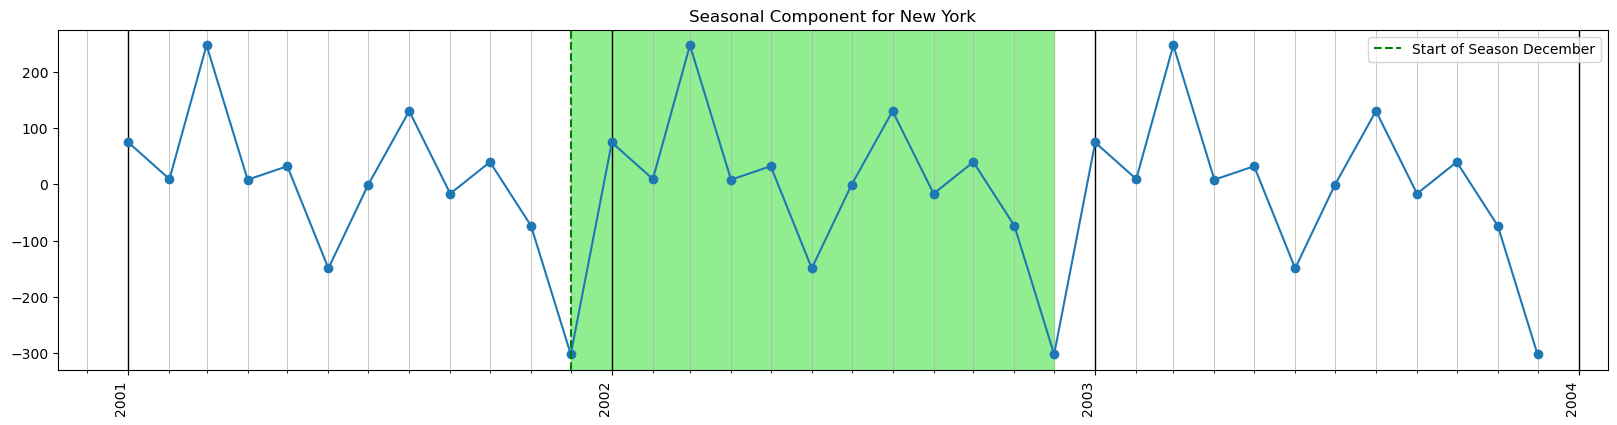

In [90]:
###GRAPH 


plt.rcParams['figure.figsize']=(20,5)

fig, ax = plot_seasonal(seasonal.loc['2001':'2003'])
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_locator(mdates.YearLocator(1))
plt.xticks(rotation=90, ha='right')
season_start = seasonal.idxmin()
ax.axvspan( season_start, season_start +period, color='lightgreen')
ax.axvline(season_start, color='green', ls='--',
           label=f"Start of Season {season_start.strftime('%B')}")
ax.legend();